# Exemplo de classificação multi-classes com as abordagens um-contra-resto e um-contra-um

Neste exemplo, usaremos 4 classes, ou seja, $Q = 4$.

In [1]:
# Import all the necessary classes.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

In [2]:
# Reset PN sequence generator.
seed = 42
np.random.seed(seed)

### Gera exemplos de quatro classes.

In [3]:
# Number of examples.
N = 1000

# Create 4-class dataset for classification.
centers = [[-5, 0], [0, 1.5], [5, -1], [10, 1.5]]
X, y = make_blobs(n_samples=N, centers=centers, random_state=seed)

In [13]:
print('Dimensão de X:', X.shape)
print('Dimensão de y:', y.shape)

Dimensão de X: (1000, 2)
Dimensão de y: (1000,)


Como temos 4 classes, os rótulos são valores inteiros de 0 à 3.

In [14]:
print(y[0:10])

[2 3 0 3 0 0 3 1 1 3]


### Plota as 4 classes.

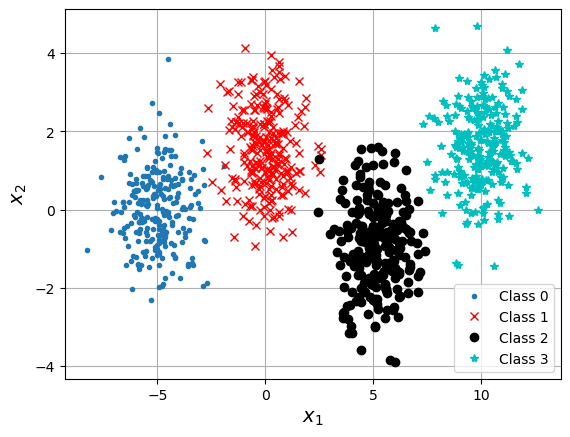

In [4]:
# Indexes of elements belonging to each class.
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
idx2 = np.argwhere(y == 2)
idx3 = np.argwhere(y == 3)

plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Class 1')
plt.plot(X[idx2,0], X[idx2,1], 'ko', label='Class 2')
plt.plot(X[idx3,0], X[idx3,1], 'c*', label='Class 3')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

#### Qual o formato mais apropriado para as funções discriminantes?

### Dividindo o conjunto total de exemplos em conjuntos de treinamento e teste.

In [5]:
# Divide o conjunto total de amostras.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Um-Contra-o-Resto

$Q = 4$, portanto, devemos treinar $4$ **classificadores binários** (e.g., regressor logístico).
<br/>

A classe `OneVsRestClassifier` automatiza o treinamento dos $Q = 4$, nós só precisamos passar um classificador binário para a classe, que se encarrega do resto.
<br/>

A classe `OneVsRestClassifier` 
+ cria os $Q$ conjuntos de treinamento binários mudando os rótulos (em cada caso uma classe sendo a + e a junção das demais sendo a -) 
+ instancia os $Q$ classificadores binários, 
+ e treina cada um dos $Q$ classificadores.
<br/><br/>

Quando usamos o objeto treinado da classe `OneVsRestClassifier` para realizar predições, ele passa o exemplo de entrada através de cada um dos $Q$ classificadores binários e verifica qual deles resultou na maior probabilidade, atribuindo a classe positiva daquele classificador ao exemplo.

**OBS**.: Como não definimos explicitamente um valor para o parâmetro `fit_intercept` da classe `LogisticRegression`, o valor padrão será usado, ou seja, `fit_intercept=True` e, portanto, o objeto da classe irá encontrar o peso de bias.

In [6]:
# Instancia o objeto Um-Contra-o-Resto.
clf = OneVsRestClassifier(LogisticRegression())

# Treina os Q classificadores binários.
clf.fit(X_train, y_train)

# Realiza predições com o conjunto de validação.
y_pred = clf.predict(X_test)

# Calcula a acurácia.
accuracy_score(y_test, y_pred)

0.9633333333333334

### Matriz de confusão

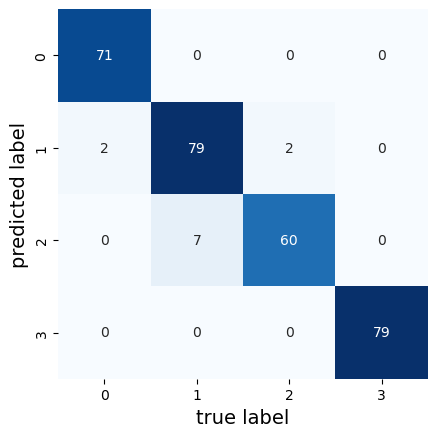

In [7]:
# Plot the confusion matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1','2','3'], yticklabels=['0','1','2','3'], cmap="Blues")
plt.xlabel('true label', fontsize=14)
plt.ylabel('predicted label', fontsize=14)
plt.show()

### Regiões de decisão resultantes da combinação dos $Q=4$ classificadores binários.

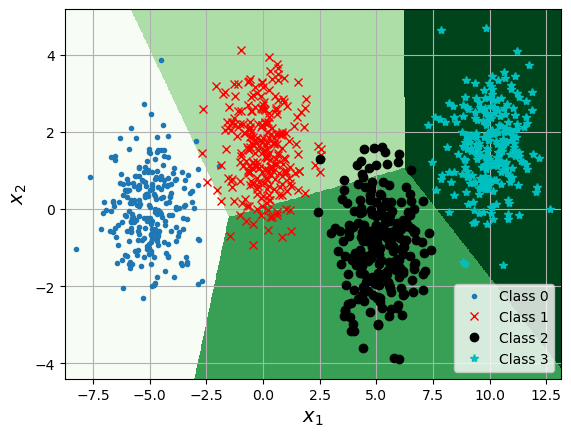

In [8]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# This attribute matrix must also follow the same shape
# as the one created for the training.
attribute_matrix = np.c_[xx.ravel(), yy.ravel()]

# Make predictions.
Z = clf.predict(attribute_matrix)

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Greens, shading='auto')

# Plot also the training points.
plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Class 1')
plt.plot(X[idx2,0], X[idx2,1], 'ko', label='Class 2')
plt.plot(X[idx3,0], X[idx3,1], 'c*', label='Class 3')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid()
plt.legend(loc='lower right')
plt.show()

# Um-Contra-Um

$Q = 4$, assim, devemos treinar $\frac{Q(Q-1)}{2} = 6$ classificadores binários.
<br/>

A classe `OneVsOneClassifier` automatiza o treinamento dos $\frac{Q(Q-1)}{2} = 6$, nós só precisamos passar um classificador binário para a classe, que se encarrega do resto.
<br/>

A classe `OneVsOneClassifier` 
+ cria os $\frac{Q(Q-1)}{2}$ conjuntos de treinamento binários mudando os rótulos (em cada caso, uma classe sendo a + e outra sendo a -) 
+ instancia os $\frac{Q(Q-1)}{2}$ classificadores binários, 
+ e treina cada um dos $\frac{Q(Q-1)}{2}$ classificadores.
<br/><br/>

Quando usamos o objeto treinado da classe `OneVsOneClassifier` para realizar predições, ele passa o exemplo de entrada através de cada um dos $\frac{Q(Q-1)}{2}$ classificadores binários e contabiliza a quantidade de votos que cada classe original recebeu, atribuindo a classe com mais votos ao exemplo.

**OBS**.: Como não definimos explicitamente um valor para o parâmetro `fit_intercept` da classe `LogisticRegression`, o valor padrão será usado, ou seja, `fit_intercept=True` e, portanto, o objeto da classe irá encontrar o peso de bias.

In [9]:
# Instancia o objeto Um-Contra-Um.
clf = OneVsOneClassifier(LogisticRegression())

# Treina os Q*(Q-1)/2 classificadores binários.
clf.fit(X_train, y_train)

# Realiza predições com o conjunto de validação.
y_pred = clf.predict(X_test)

# Calcula a acurácia.
accuracy_score(y_test, y_pred)

0.9966666666666667

### Matriz de confusão

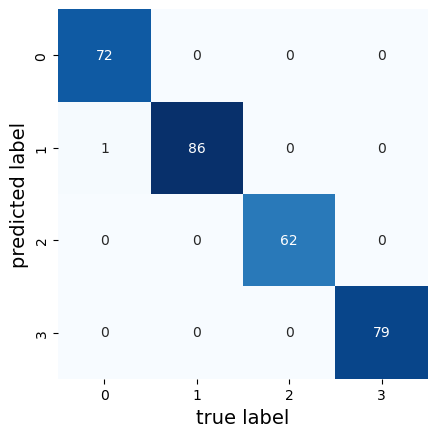

In [10]:
# Plot the confusion matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1','2','3'], yticklabels=['0','1','2','3'], cmap="Blues")
plt.xlabel('true label', fontsize=14)
plt.ylabel('predicted label', fontsize=14)
plt.show()

### Regiões de decisão resultantes da combinação dos $Q(Q-1)/2=6$ classificadores binários.

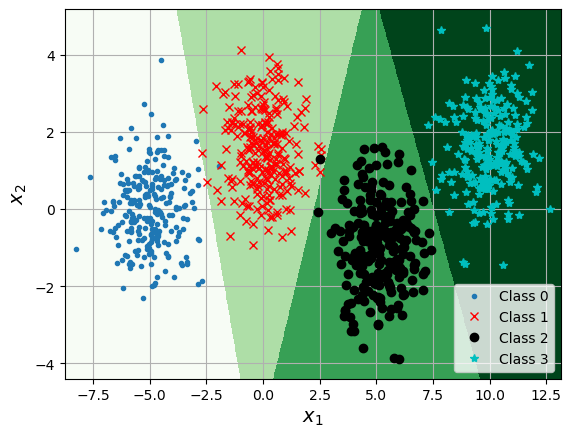

In [11]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# This attribute matrix must also follow the same shape as the one created for the training.
attribute_matrix = np.c_[xx.ravel(), yy.ravel()]

# Make predictions.
Z = clf.predict(attribute_matrix)

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Greens, shading='auto')

# Plot also the training points.
plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Class 1')
plt.plot(X[idx2,0], X[idx2,1], 'ko', label='Class 2')
plt.plot(X[idx3,0], X[idx3,1], 'c*', label='Class 3')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid()
plt.legend(loc='lower right')
plt.show()

### Por que o classificador um-contra-um obteve um resultado melhor?

Para entender, vamos olhar um exemplo onde os classificadores binários para ambas as abordagens foram treinados de forma individual e depois combinados.

+ [Classification of four classes with OvA and OvO](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classifica%C3%A7%C3%A3o/ClassificationOfFourClassesWithOvAandOvOv1.ipynb)